### Keras - Multi Layer Neural Network 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_csv('DATA\Mobile_Dataset.csv')

In [15]:
df 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [16]:
dataset = df.values

In [17]:
dataset

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 0.000e+00,
        3.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        3.000e+00]])

In [18]:
X = dataset[:,0:20]
y = dataset[:,20]

Data normalization is crucial because it makes training simpler when the input features are of the same size. We'll use a scikit-learn min-max scaler to scale our data to be between 0 and 1.

In [19]:
from sklearn import preprocessing

In [20]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_X = min_max_scaler.fit_transform(X)

In [21]:
scaled_X

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [22]:
from sklearn.model_selection import train_test_split

Finally, we want to reserve a portion of our dataset for a test set and a validation set. To accomplish that, we use the scikit-learn function train test split.

In [23]:
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(scaled_X, y, test_size=0.2, random_state=101)


In [24]:
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5, random_state=101)

In [25]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1600, 20) (200, 20) (200, 20) (1600,) (200,) (200,)


#### Building and Training Neural Network

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam

We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

- Hidden layer 1: 30 neurons, ReLU activation
- Hidden layer 2: 30 neurons, ReLU activation
- Layer: 1 neuron, softmax activation

In [27]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(20,)),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax'),
])

Now that we've defined our architecture, we need to choose the ideal numbers to use. We must set up the model before we begin training by

- what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- what loss function to use  Sparse Categorical Cross entropy
- what other metrics you want to track apart from the loss function (we want to track accuracy as well)

In [28]:
model.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(), metrics="accuracy")

In [29]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))


Epoch 1/100
50/50 [==============================] - 1s 13ms/step - loss: 1.3852 - accuracy: 0.2825 - val_loss: 1.3569 - val_accuracy: 0.3250
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 1.3159 - accuracy: 0.4031 - val_loss: 1.2912 - val_accuracy: 0.3750
Epoch 3/100
50/50 [==============================] - 0s 6ms/step - loss: 1.2027 - accuracy: 0.5044 - val_loss: 1.1463 - val_accuracy: 0.4750
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 1.0176 - accuracy: 0.5781 - val_loss: 0.9262 - val_accuracy: 0.6550
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 0.8291 - accuracy: 0.6963 - val_loss: 0.7753 - val_accuracy: 0.7300
Epoch 6/100
50/50 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.7663 - val_loss: 0.6722 - val_accuracy: 0.7900
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 0.5977 - accuracy: 0.8025 - val_loss: 0.5961 - val_accuracy: 0.7750
Epoch 8/100


### Evaluate Model

In [30]:
model.evaluate(X_test, y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9350


0.9350000023841858

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [51]:
# return prediction array
def predictionRelease(predictionMatrix):
    predictionArr = []
    for i in range(0, len(predictionMatrix)):
        maxArg = np.argmax(predictionMatrix[i])
        predictionArr.append(maxArg)
    len(predictionArr)
    return predictionArr


In [34]:
test_pred = predictionRelease(y_pred)

In [35]:
accuracy_score(y_test, test_pred)

0.935

In [36]:
confusion_matrix(y_test, test_pred)

array([[43,  0,  0,  0],
       [ 2, 53,  0,  0],
       [ 0,  5, 48,  5],
       [ 0,  0,  1, 43]], dtype=int64)

In [37]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        43
         1.0       0.91      0.96      0.94        55
         2.0       0.98      0.83      0.90        58
         3.0       0.90      0.98      0.93        44

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.93       200



### Visualizing Loss and Accuracy

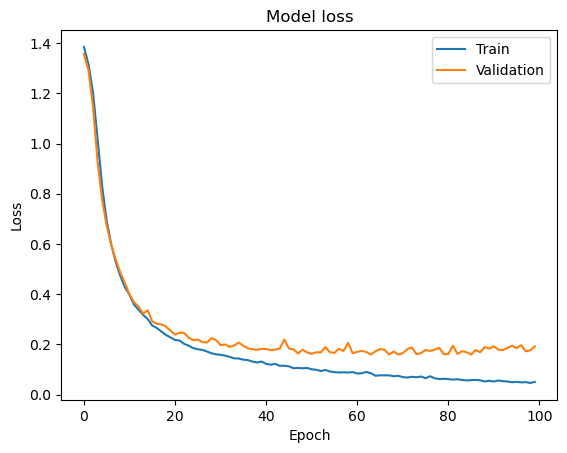

In [38]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

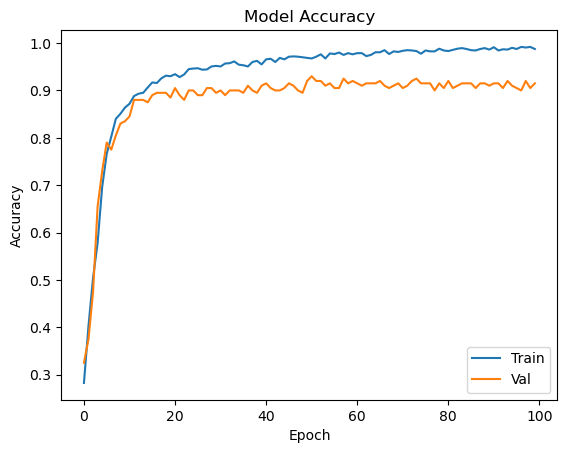

In [39]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Adding Regularization to our Neural Network 
over fitting problem - We'll train a model which will over-fit (Model 2) 

In [40]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(20,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(4, activation='softmax'),
])

In [41]:
model_2.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(), metrics="accuracy")

In [42]:
hist_2 = model_2.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
50/50 [==============================] - 3s 52ms/step - loss: 0.8069 - accuracy: 0.6250 - val_loss: 0.5956 - val_accuracy: 0.7200
Epoch 2/100
50/50 [==============================] - 2s 45ms/step - loss: 0.4183 - accuracy: 0.8288 - val_loss: 0.3169 - val_accuracy: 0.8550
Epoch 3/100
50/50 [==============================] - 2s 45ms/step - loss: 0.3693 - accuracy: 0.8444 - val_loss: 0.3177 - val_accuracy: 0.8600
Epoch 4/100
50/50 [==============================] - 2s 47ms/step - loss: 0.2777 - accuracy: 0.8819 - val_loss: 0.4069 - val_accuracy: 0.8050
Epoch 5/100
50/50 [==============================] - 2s 43ms/step - loss: 0.3035 - accuracy: 0.8775 - val_loss: 0.3743 - val_accuracy: 0.8250
Epoch 6/100
50/50 [==============================] - 2s 42ms/step - loss: 0.1953 - accuracy: 0.9231 - val_loss: 0.2421 - val_accuracy: 0.9200
Epoch 7/100
50/50 [==============================] - 2s 42ms/step - loss: 0.2054 - accuracy: 0.9206 - val_loss: 0.3510 - val_accuracy: 0.8450
Epoch 

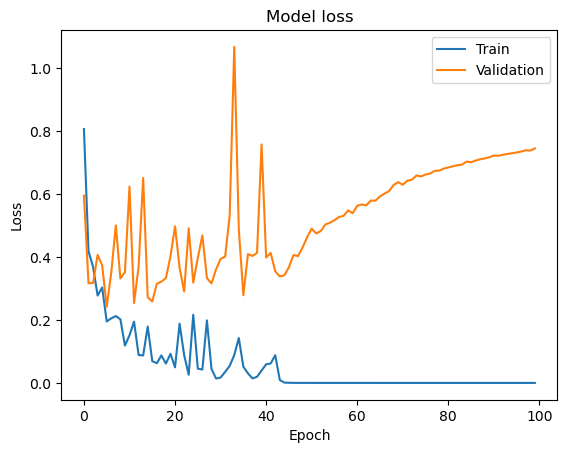

In [43]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

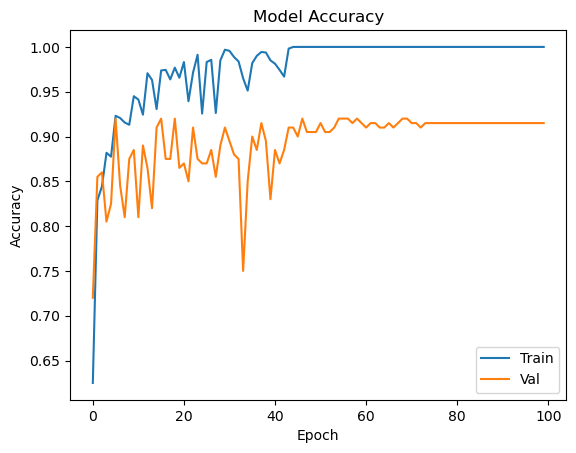

In [44]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


### How to Handle Over-fitting
Handling overfitting - we'll incorporate L2 regularization and dropout in our model here (Model 3).

In [45]:
from keras.layers import Dropout
from keras import regularizers

In [46]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(20,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(4, activation='softmax', kernel_regularizer=regularizers.l2(0.01)),
])


In [47]:
model_3.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(), metrics="accuracy")

In [48]:
hist_3 = model_3.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
50/50 [==============================] - 6s 116ms/step - loss: 11.4619 - accuracy: 0.4044 - val_loss: 1.9935 - val_accuracy: 0.5700
Epoch 2/100
50/50 [==============================] - 4s 80ms/step - loss: 1.3162 - accuracy: 0.6712 - val_loss: 1.0765 - val_accuracy: 0.7000
Epoch 3/100
50/50 [==============================] - 4s 80ms/step - loss: 0.9663 - accuracy: 0.7663 - val_loss: 0.9968 - val_accuracy: 0.7350
Epoch 4/100
50/50 [==============================] - 4s 74ms/step - loss: 0.8609 - accuracy: 0.8100 - val_loss: 0.7507 - val_accuracy: 0.8850
Epoch 5/100
50/50 [==============================] - 4s 76ms/step - loss: 0.8275 - accuracy: 0.8300 - val_loss: 0.7659 - val_accuracy: 0.8800
Epoch 6/100
50/50 [==============================] - 4s 79ms/step - loss: 0.7685 - accuracy: 0.8469 - val_loss: 0.7403 - val_accuracy: 0.8850
Epoch 7/100
50/50 [==============================] - 4s 84ms/step - loss: 0.7865 - accuracy: 0.8350 - val_loss: 0.7061 - val_accuracy: 0.9050
Epoc

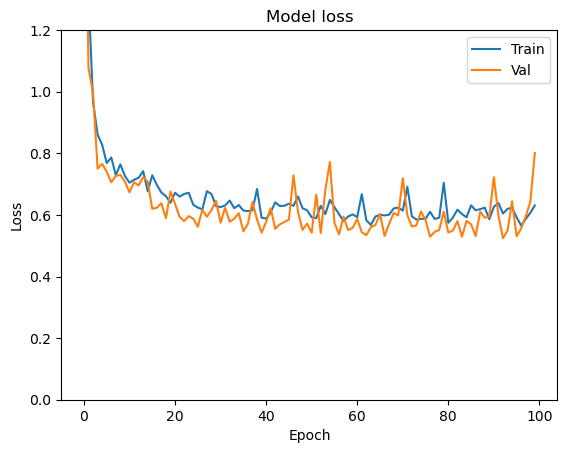

In [49]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

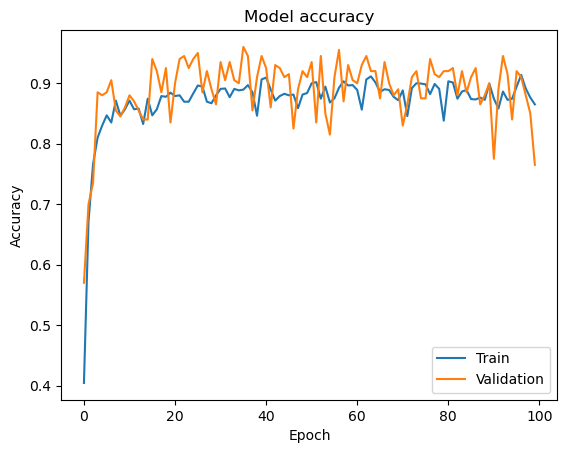

In [50]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

- Compared to model_2 loss and accuracy graphs, Clearly we can understand this model_3 is much less over-fitting